**In this example we will implement basic linear regression model. Example and data is taken from
https://github.com/jdwittenauer/ipython-notebooks**

In [25]:
# import of required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# read data from the data.txt
import os
path = os.getcwd() + '\data.txt'
data = pd.read_csv(path, header=None, names=['X', 'Y'])
data.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.describe()  # look at the data stats

,X,Y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


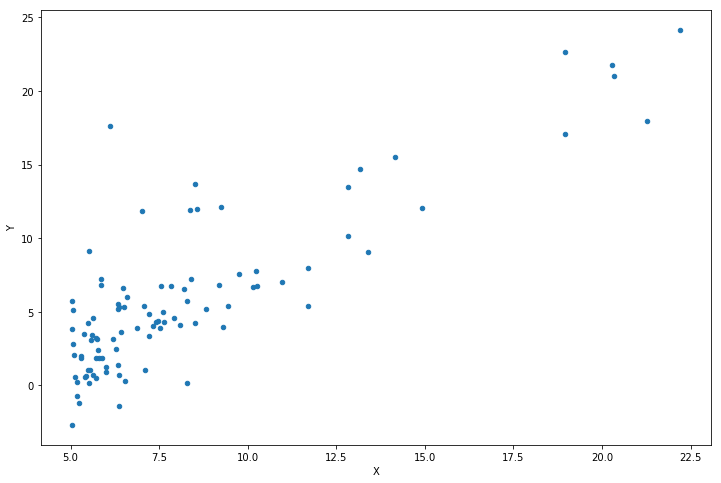

In [27]:
data.plot(kind='scatter', x='X', y='Y', figsize=(12,8))  # Plot data on scattered graph

**Now we will declare fxn computeCost which will compute the cost characterized by the parameters theta**

In [10]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

**Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.**

In [11]:
data.insert(0, 'Ones', 1)

**variable initialization.**

In [12]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [13]:
X.head()  

,Ones,X
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [14]:
y.head()

,Y
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


**Before we use X and y we need to convert them since the cost function is expecting numpy matrices**

In [15]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

**shape of  matrices: **

In [16]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

**let's compute the cost for our initial solution (0 values for theta)**

In [17]:
computeCost(X, y, theta)

32.072733877455676

**Lets declare function to perform gradient descent on the parameters theta using the update rules defined in the text.**

In [18]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

**Initialize alpha and iterations**

In [19]:
alpha = 0.01
iters = 1000

In [20]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

**Let's compute the cost (error) of the trained model using our fitted parameters.**

In [21]:
computeCost(X, y, g)

4.5159555030789118

**Now let's plot the linear model along with the data to visually see how well it fits.
**

Text(0.5,1,'Predicted Y vs. X Size')

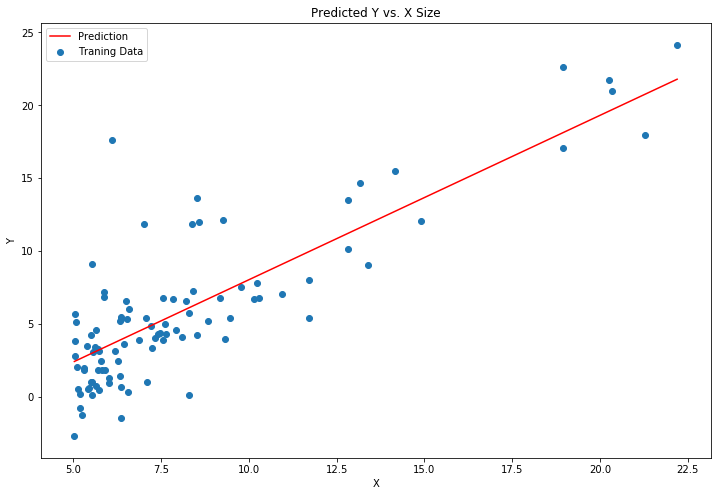

In [23]:
x = np.linspace(data.X.min(), data.X.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.X, data.Y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Predicted Y vs. X Size')

**Finally plot Error vs Training Epoch graph**

Text(0.5,1,'Error vs. Training Epoch')

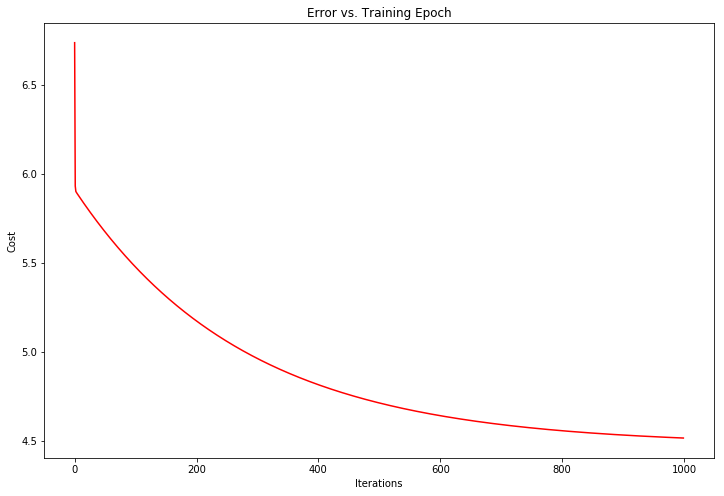

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')